#### Iris example

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


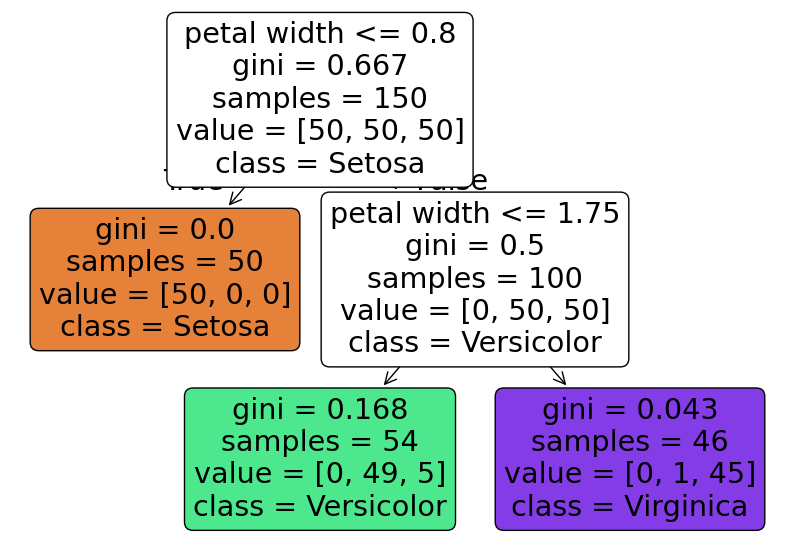

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

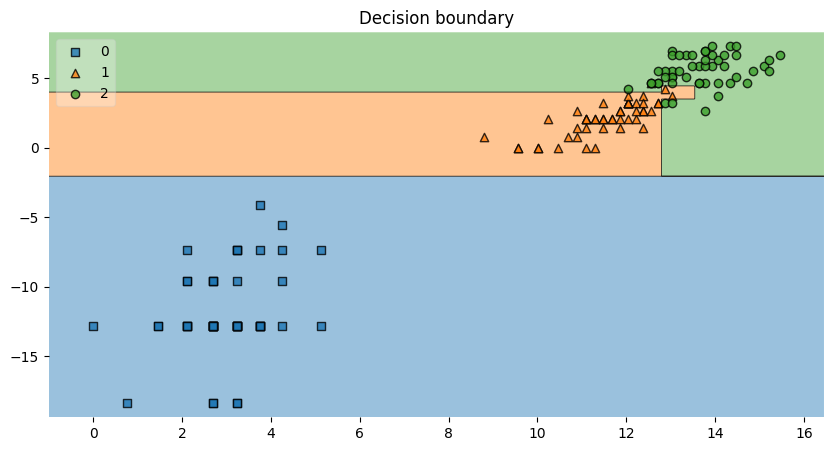

In [3]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

#### Data load

In [4]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("diabetes.csv")

# Zamiana wartości nieliczbowych na NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Zamiana wartości 0 na NaN w wybranych kolumnach
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_check] = df[columns_to_check].replace(0, pd.NA)

# Wypełnienie wartości NaN średnimi z pozostałych wierszy
for column in df.columns[:-1]:
    df[column] = df[column].fillna(df[column].mean())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

df

/tmp/ipykernel_39382/4033685513.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mean())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [5]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("diabetes.csv")

# Zamiana wartości nieliczbowych na NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Zamiana wartości 0 na NaN w wybranych kolumnach
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_check] = df[columns_to_check].replace(0, pd.NA)

# Wypełnienie wartości NaN średnimi z pozostałych wierszy
for column in df.columns[:-1]:
    df[column] = df[column].fillna(df[column].mean())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

df

/tmp/ipykernel_39382/4033685513.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mean())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


#### Decision tree model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
def try_configuration(criterion, max_depth=5, min_samples_split=2, min_samples_leaf=1):
    model = DecisionTreeClassifier(criterion=criterion, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   min_samples_leaf=min_samples_leaf, 
                                   random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return 100 * accuracy_score(y_test, y_pred)
    
print("Dokładność modelu (gini + max_depth=10): {:.2f}%".format(try_configuration(criterion='gini')))

Dokładność modelu (gini + max_depth=10): 72.73%


#### Hyperparameters study

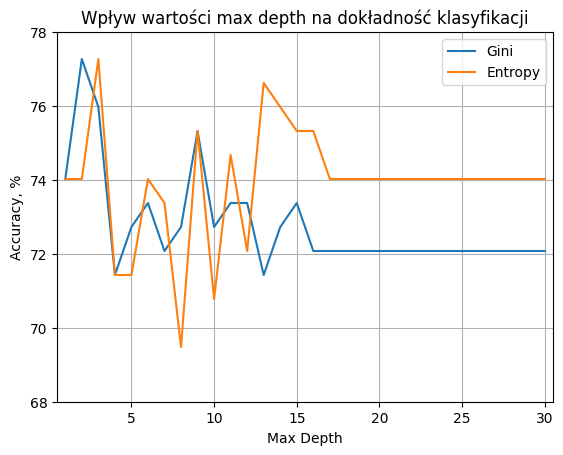

,Max Depth,Accuracy (Gini),Accuracy (Entropy)
0,1,74.025974,74.025974
1,1,74.025974,74.025974
2,2,77.272727,74.025974
3,2,77.272727,74.025974
4,3,75.974026,77.272727


In [7]:
res_gini_maxdepth = []
res_entropy_maxdepth = []

max_depth_values = np.linspace(1, 30, dtype=int)

for max_depth_value in max_depth_values:
    res_gini_maxdepth.append(try_configuration(criterion='gini', max_depth=max_depth_value))
    res_entropy_maxdepth.append(try_configuration(criterion='entropy', max_depth=max_depth_value))

plt.plot(max_depth_values, res_gini_maxdepth, label='Gini')
plt.plot(max_depth_values, res_entropy_maxdepth, label='Entropy')
plt.xlim([0.5, 30.5])
plt.ylim([68, 78])
plt.title('Wpływ wartości max depth na dokładność klasyfikacji')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy, %')
plt.grid(True)
plt.legend()
plt.show()

results = pd.DataFrame({'Max Depth': max_depth_values, 'Accuracy (Gini)': res_gini_maxdepth, 'Accuracy (Entropy)': res_entropy_maxdepth})
results.head()

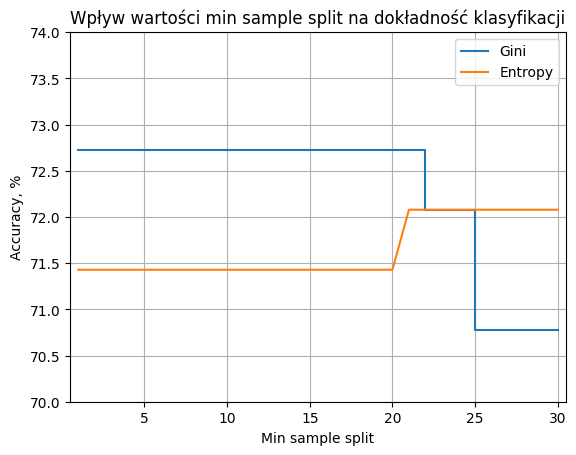

,Min sample split,Accuracy (Gini),Accuracy (Entropy)
0,2,72.727273,71.428571
1,2,72.727273,71.428571
2,3,72.727273,71.428571
3,3,72.727273,71.428571
4,4,72.727273,71.428571


In [8]:
res_gini_min_split = []
res_entropy_min_split = []

min_samples_split_values = np.linspace(2, 30, dtype=int)

for min_sample_split in min_samples_split_values:
    res_gini_min_split.append(try_configuration(criterion='gini', min_samples_split=min_sample_split))
    res_entropy_min_split.append(try_configuration(criterion='entropy', min_samples_split=min_sample_split))

plt.plot(max_depth_values, res_gini_min_split, label='Gini')
plt.plot(max_depth_values, res_entropy_min_split, label='Entropy')
plt.xlim([0.5, 30.5])
plt.ylim([70, 74])
plt.title('Wpływ wartości min sample split na dokładność klasyfikacji')
plt.xlabel('Min sample split')
plt.ylabel('Accuracy, %')
plt.grid(True)
plt.legend()
plt.show()

results = pd.DataFrame({'Min sample split': min_samples_split_values, 'Accuracy (Gini)': res_gini_min_split, 'Accuracy (Entropy)': res_entropy_min_split})
results.head()

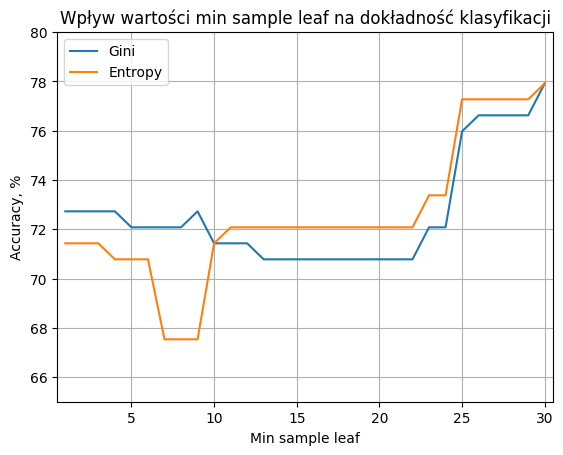

,Min sample leaf,Accuracy (Gini),Accuracy (Entropy)
0,1,72.727273,71.428571
1,1,72.727273,71.428571
2,2,72.727273,71.428571
3,2,72.727273,71.428571
4,3,72.727273,71.428571


In [9]:
res_gini_min_leaf = []
res_entropy_min_leaf = []

min_samples_leaf_values = np.linspace(1, 30, dtype=int)

for min_sample_leaf in min_samples_leaf_values:
    res_gini_min_leaf.append(try_configuration(criterion='gini', min_samples_leaf=min_sample_leaf))
    res_entropy_min_leaf.append(try_configuration(criterion='entropy', min_samples_leaf=min_sample_leaf))

plt.plot(max_depth_values, res_gini_min_leaf, label='Gini')
plt.plot(max_depth_values, res_entropy_min_leaf, label='Entropy')
plt.xlim([0.5, 30.5])
plt.ylim([65, 80])
plt.title('Wpływ wartości min sample leaf na dokładność klasyfikacji')
plt.xlabel('Min sample leaf')
plt.ylabel('Accuracy, %')
plt.grid(True)
plt.legend()
plt.show()

results = pd.DataFrame({'Min sample leaf': min_samples_leaf_values, 'Accuracy (Gini)': res_gini_min_leaf, 'Accuracy (Entropy)': res_entropy_min_leaf})
results.head()

#### Probability prediction example

In [10]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

model.predict_proba(X_test[:5])

array([[0.65088757, 0.34911243],
       [0.92307692, 0.07692308],
       [0.92307692, 0.07692308],
       [0.65088757, 0.34911243],
       [0.68333333, 0.31666667]])

In [11]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

model.predict_proba(X_test[:5])

array([[0.3956044 , 0.6043956 ],
       [0.921875  , 0.078125  ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.80952381, 0.19047619]])

In [12]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

model.predict_proba(X_test[:5])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Decision boundaries

/home/damian/Documents/Studia/MOW/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


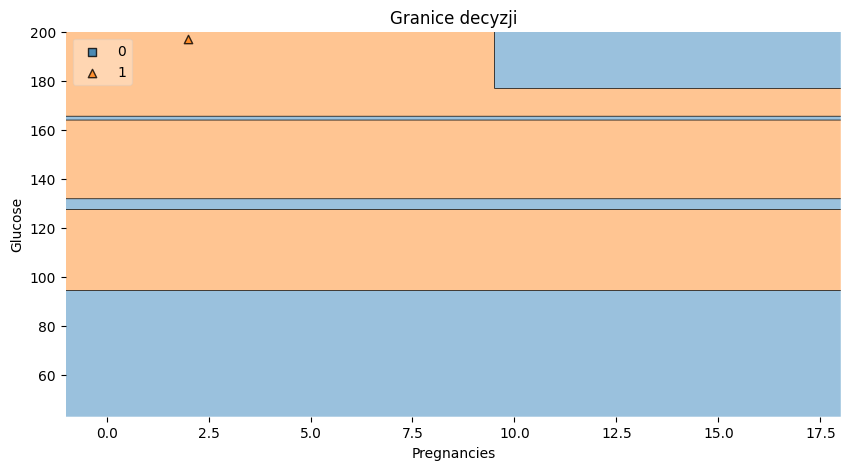

In [13]:
plt.figure(figsize=(10,5))
width=0.75
fig = plot_decision_regions(X.values, y.values, clf=model,
                  filler_feature_values={2: 70.0, 3:45.0, 4:543.0, 5:30.5, 6:0.158, 7:53},
                  filler_feature_ranges={2: width, 3: width, 4:width, 5:width, 6:width, 7:width},
                  legend=2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.title("Granice decyzji")
plt.show()

#### Grid search optimization

In [14]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 30)),
    'min_samples_split': list(range(2, 30)),
    'min_samples_leaf': list(range(1, 30)),
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

grid_search.fit(X, y)

print("Najlepsze parametry:", grid_search.best_params_)
print(f"Najlepszy wynik: {round(100 * grid_search.best_score_, 2)}%")

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 14, 'splitter': 'random'}
Najlepszy wynik: 76.57%
